In [18]:
import datetime
import pandas as pd
df=pd.read_csv("/Users/anandkoti/Downloads/SMA_data.csv")

In [19]:
df.head()

,Datetime,SMA
0,2018-01-01 04:34:10.320672,6864.691463
1,2018-01-01 12:37:36.596064,6864.689664
2,2018-01-01 20:31:55.898112,6864.688585
3,2018-01-02 05:42:49.014720,6864.684927
4,2018-01-02 12:13:01.263360,6864.682858


In [20]:
df.tail()

,Datetime,SMA
2286,2019-12-30 03:03:24.992640,6872.930137
2287,2019-12-30 11:05:46.768704,6872.928514
2288,2019-12-30 19:01:25.464576,6872.927281
2289,2019-12-31 10:44:01.110912,6872.923732
2290,2019-12-31 18:43:37.271136,6872.922860


In [21]:
df.shape

(2291, 2)

In [22]:
df.columns

Index(['Datetime', 'SMA'], dtype='object')

In [23]:
df.dtypes

Datetime     object
SMA         float64
dtype: object

In [24]:
df.value_counts()

Datetime                    SMA        
2018-01-01 04:34:10.320672  6864.691463    1
2019-04-28 21:23:23.421984  6872.935009    1
2019-04-26 20:45:41.402592  6872.944632    1
2019-04-27 04:31:14.277216  6872.941354    1
2019-04-27 12:34:49.948608  6872.939670    1
                                          ..
2018-09-02 05:35:39.685344  6864.081310    1
2018-09-01 20:26:21.918048  6864.080501    1
2018-09-01 12:46:23.000160  6864.080950    1
2018-09-01 05:57:50.468256  6864.080051    1
2019-12-31 18:43:37.271136  6872.922860    1
Name: count, Length: 2291, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  2291 non-null   object 
 1   SMA       2291 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.9+ KB


In [26]:
df.describe()

,SMA
count,2291.000000
mean,6867.611447
std,4.251829
min,6863.806871
25%,6864.211480
50%,6864.558916
75%,6872.988868
max,6873.482523


In [27]:
df.isnull().sum()

Datetime    0
SMA         0
dtype: int64

In [28]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract useful features from the timestamp
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['hour'] = df['Datetime'].dt.hour
df['minute'] = df['Datetime'].dt.minute
df['second'] = df['Datetime'].dt.second

In [29]:
df = df.drop('Datetime', axis=1)

# Now df contains numerical features
print(df)

              SMA  year  month  day  hour  minute  second
0     6864.691463  2018      1    1     4      34      10
1     6864.689664  2018      1    1    12      37      36
2     6864.688585  2018      1    1    20      31      55
3     6864.684927  2018      1    2     5      42      49
4     6864.682858  2018      1    2    12      13       1
...           ...   ...    ...  ...   ...     ...     ...
2286  6872.930137  2019     12   30     3       3      24
2287  6872.928514  2019     12   30    11       5      46
2288  6872.927281  2019     12   30    19       1      25
2289  6872.923732  2019     12   31    10      44       1
2290  6872.922860  2019     12   31    18      43      37

[2291 rows x 7 columns]


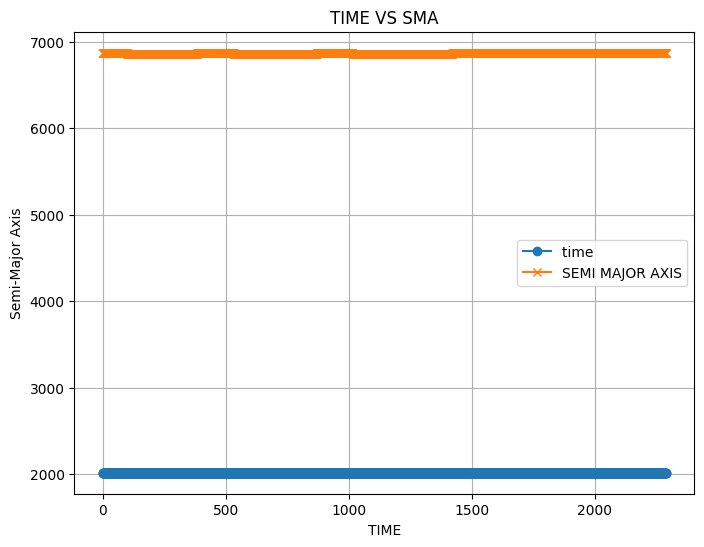

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(df['year'], label="time ", marker='o')
plt.plot(df['SMA'], label="SEMI MAJOR AXIS", marker='x')

# Add labels and title
plt.title("TIME VS SMA")
plt.xlabel("TIME")
plt.ylabel("Semi-Major Axis")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error,accuracy_score


X = df.drop('SMA', axis=1)  
y = df['SMA']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")



Mean Squared Error: 0.03


In [33]:
print("Actual vs Predicted values:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted:.2f}")

Actual vs Predicted values:
Actual: 6873.06447184706, Predicted: 6873.06
Actual: 6864.05505191193, Predicted: 6864.05
Actual: 6864.06122675014, Predicted: 6864.06
Actual: 6864.60424716744, Predicted: 6864.61
Actual: 6873.03821792488, Predicted: 6873.03
Actual: 6873.25694811977, Predicted: 6873.35
Actual: 6873.01845998383, Predicted: 6873.02
Actual: 6873.04705942393, Predicted: 6873.05
Actual: 6873.1389044327, Predicted: 6873.14
Actual: 6863.86414835311, Predicted: 6863.86
Actual: 6864.17591340536, Predicted: 6864.17
Actual: 6864.45305762508, Predicted: 6864.45
Actual: 6864.76686841257, Predicted: 6864.78
Actual: 6864.517243959, Predicted: 6864.52
Actual: 6864.46969616169, Predicted: 6864.47
Actual: 6864.2636852055, Predicted: 6864.27
Actual: 6863.80687088211, Predicted: 6863.81
Actual: 6873.15709937126, Predicted: 6873.16
Actual: 6873.11574741233, Predicted: 6873.11
Actual: 6864.34936134216, Predicted: 6864.35
Actual: 6863.82938009632, Predicted: 6863.83
Actual: 6864.22081816295, Predi

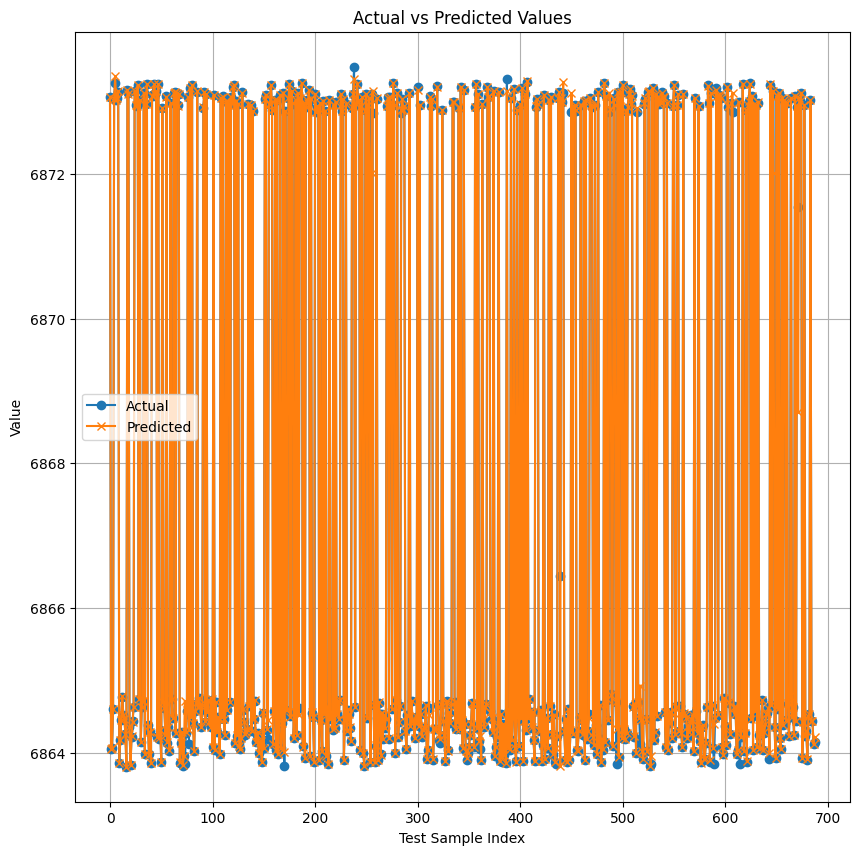

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')

# Add labels and title
plt.title("Actual vs Predicted Values")
plt.xlabel("Test Sample Index")
plt.ylabel("Value")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

Maneuver Detection Results (True = Maneuver Detected,):
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, T

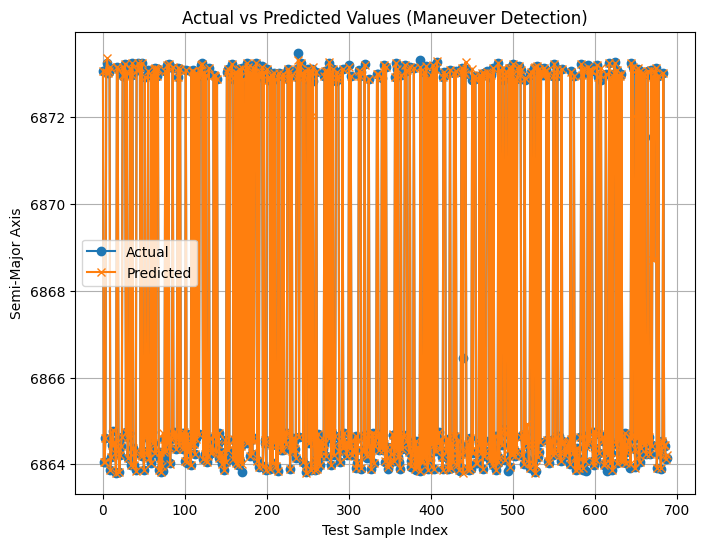

In [41]:
# Detect maneuvers: Compare actual values to predicted values
maneuvers = []
for actual, predicted in zip(y_test, y_pred):
    if abs(actual - predicted) :
        maneuvers.append(True)  # Maneuver detected
    else:
         print("not detected")# No maneuver
                
# Output the results
print("Maneuver Detection Results (True = Maneuver Detected,):")
print(maneuvers)

# Evaluate the model's performance

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')

# Add labels and title
plt.title("Actual vs Predicted Values (Maneuver Detection)")
plt.xlabel("Test Sample Index")
plt.ylabel("Semi-Major Axis")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


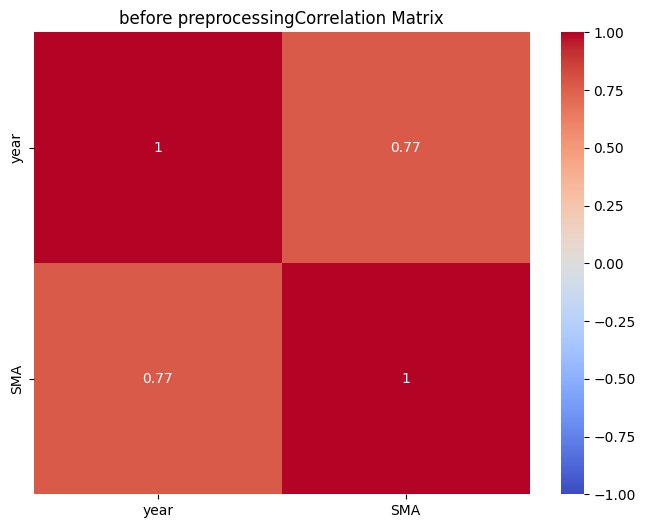

In [42]:
import seaborn as sns
correlation_matrix = df[['year', 'SMA']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('before preprocessingCorrelation Matrix')
plt.show()

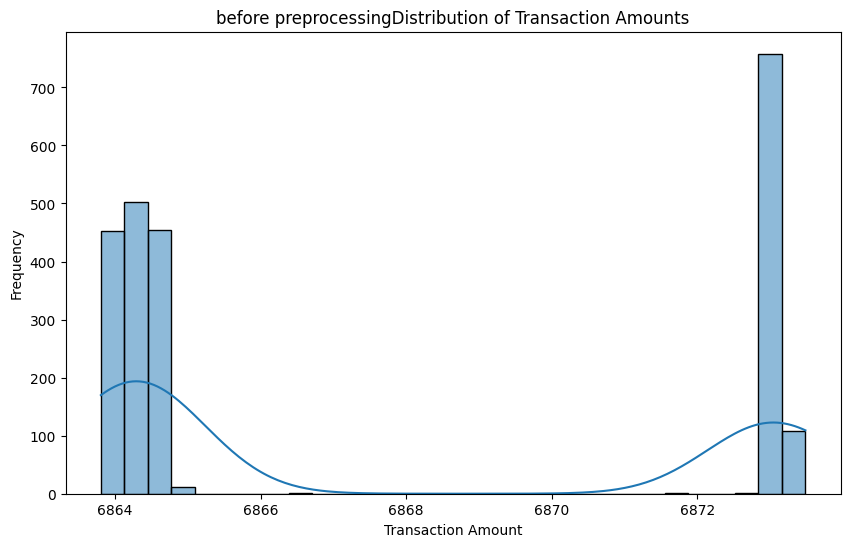

In [43]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['SMA'], bins=30, kde=True)
plt.title('before preprocessingDistribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()